In [2]:
#Import Packages
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [3]:
#%%
#Gives the resolution at Nside
NSIDE = 4
print("Approximate resolution at NSIDE {} is {:.2} deg".format(NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60))

Approximate resolution at NSIDE 4 is 1.5e+01 deg


In [4]:
#Gives the number of pixels
NPIX = 12*NSIDE**2
print('Number of pixels =',NPIX)


Number of pixels = 192


actmap = [-10.          -9.89528796  -9.79057592  -9.68586387  -9.58115183
  -9.47643979  -9.37172775  -9.26701571  -9.16230366  -9.05759162
  -8.95287958  -8.84816754  -8.7434555   -8.63874346  -8.53403141
  -8.42931937  -8.32460733  -8.21989529  -8.11518325  -8.0104712
  -7.90575916  -7.80104712  -7.69633508  -7.59162304  -7.48691099
  -7.38219895  -7.27748691  -7.17277487  -7.06806283  -6.96335079
  -6.85863874  -6.7539267   -6.64921466  -6.54450262  -6.43979058
  -6.33507853  -6.23036649  -6.12565445  -6.02094241  -5.91623037
  -5.81151832  -5.70680628  -5.60209424  -5.4973822   -5.39267016
  -5.28795812  -5.18324607  -5.07853403  -4.97382199  -4.86910995
  -4.76439791  -4.65968586  -4.55497382  -4.45026178  -4.34554974
  -4.2408377   -4.13612565  -4.03141361  -3.92670157  -3.82198953
  -3.71727749  -3.61256545  -3.5078534   -3.40314136  -3.29842932
  -3.19371728  -3.08900524  -2.98429319  -2.87958115  -2.77486911
  -2.67015707  -2.56544503  -2.46073298  -2.35602094  -2.2513089
  -

/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will 

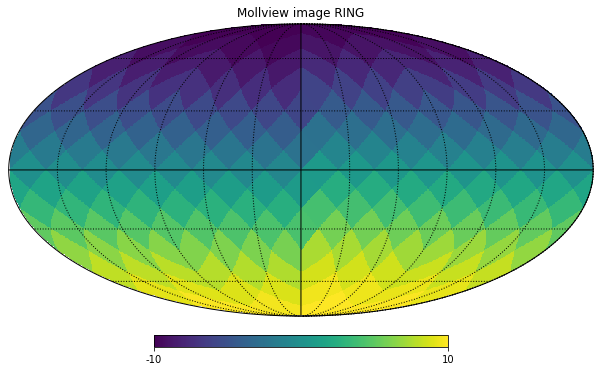

In [13]:
#RING scheme takes a array where each element is each 
actmap = np.linspace(-10,10,NPIX)
print('actmap =',actmap)
hp.mollview(actmap, title="Mollview image RING")
hp.graticule()


actcl =  [4.82165020e-08 1.41393329e+02 7.14862801e-02 2.38599976e-02
 1.17701969e-02 6.54886429e-03 3.90264801e-03 2.74840986e-03
 1.90130764e-03 1.47827077e-03 1.10362345e-03 1.14919021e-03]


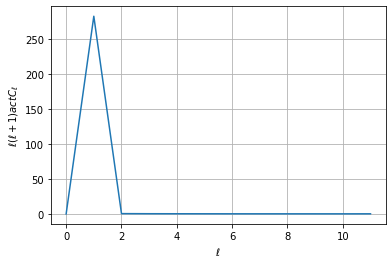

In [21]:
#anafast creates a map from cl's and synfast creates cls from a map.
actcl = hp.anafast(actmap, lmax=((3*NSIDE)-1))    #lmax = 3NSIDE -1 by default
print('actcl = ', actcl)
ell = np.arange(len(actcl))
plt.figure()
plt.plot(ell, ell * (ell + 1) * actcl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)actC_{\ell}$")
plt.grid()

In [7]:
map = []
noisemat = []
for i in range(len(actmap)):
    noisemat.append(np.random.normal(0,1))
    map.append(actmap[i] + noisemat[-1])

map = np.array(map)    
noisemat = np.array(noisemat)
print('map =',map)
    

map = [-11.46393192 -10.11074646  -9.84059764  -9.56889168 -10.59882032
  -9.5154638   -9.16229802 -10.48582433  -9.67489324  -9.2307519
  -8.43752949 -12.08909312  -9.58413636  -8.90776482  -8.70540752
  -8.0453427   -8.61422922  -7.73006882  -9.86408924  -8.3697454
  -8.79227887  -6.81696922  -6.7552359   -6.42541721  -8.10558591
  -7.35226084  -6.71639942  -6.32059696  -7.38648058  -9.32427616
  -7.30384821  -6.31631772  -8.03316377  -8.23830813  -6.91064929
  -6.0114248   -5.33568898  -3.53823488  -6.03732987  -6.11161674
  -5.16105485  -5.81546105  -6.32632657  -5.40651739  -6.51289563
  -6.94784824  -7.57593109  -6.76374336  -5.44869313  -3.83620914
  -3.9881665   -3.90393426  -5.66469277  -4.28858058  -5.1187483
  -2.41439136  -3.083089    -5.09585554  -3.9222096   -3.90964314
  -2.74071589  -4.9298206   -3.56728993  -4.75246251  -2.44362397
  -2.49350478  -3.22956108  -3.40028733  -3.56756143  -4.55746929
  -2.47232317  -3.05635328  -2.42279786  -0.42553024  -1.08613842
  -3.58

cl =  [6.22440044e-02 1.47718675e+02 4.40297330e-02 4.04239784e-02
 1.83469655e-01 8.54730176e-02 1.23701875e-01 4.09390619e-02
 8.37077833e-02 5.45734580e-02 6.26436829e-02 6.25411069e-02]


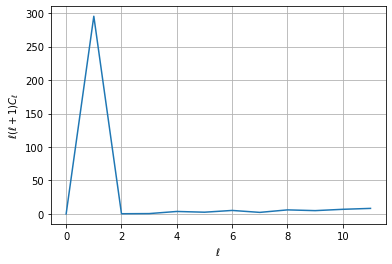

In [18]:
cl = hp.anafast(map, lmax=((3*NSIDE)-1))
print('cl = ', cl)
ell = np.arange(len(cl))
plt.figure()
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

In [9]:
alms = []

for l in range(len(ell)):
    alms.append([])
    
    
    for m in range(len(ell)): #set negative m's
        alms[-1].append([np.random.normal(0,0.5*cl[l]),np.random.normal(0,0.5*cl[m])])
        print('alms =',alms)
    
    alms[-1].append([np.random.normal(0,cl[l]),0.0])        #set m=0
    
    for m in range(len(ell)):                    #set positive m's
        alms[-1].append()



alms = [[[0.008230209894163223, 0.05226739005851811]]]
alms = [[[0.008230209894163223, 0.05226739005851811], [-0.030407775017203098, -67.88460174185352]]]
alms = [[[0.008230209894163223, 0.05226739005851811], [-0.030407775017203098, -67.88460174185352], [-0.04307323756384864, 0.03706617749134211]]]
alms = [[[0.008230209894163223, 0.05226739005851811], [-0.030407775017203098, -67.88460174185352], [-0.04307323756384864, 0.03706617749134211], [0.026307891345403765, 0.011069635003968488]]]
alms = [[[0.008230209894163223, 0.05226739005851811], [-0.030407775017203098, -67.88460174185352], [-0.04307323756384864, 0.03706617749134211], [0.026307891345403765, 0.011069635003968488], [-0.008447874150710704, -0.05805780715381525]]]
alms = [[[0.008230209894163223, 0.05226739005851811], [-0.030407775017203098, -67.88460174185352], [-0.04307323756384864, 0.03706617749134211], [0.026307891345403765, 0.011069635003968488], [-0.008447874150710704, -0.05805780715381525], [0.024462542050752625, -0.01356683

TypeError: append() takes exactly one argument (0 given)

In [ ]:
#negative log of the posterior, psi, ignoring the prior term.
psi =0.5*(d-Ya)(n^-1)*()

In [12]:
x = hp.synalm(cl,lmax = ((3*NSIDE)-1))
print(x[0])

(-0.12912922779130623+0j)


In [65]:
#%%
#can also use vectors to represent coordinates e.g.
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)



[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


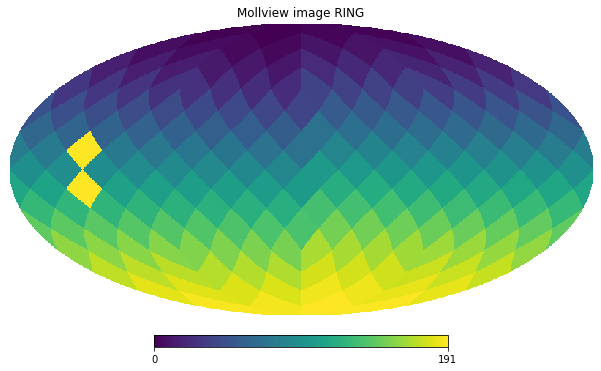

In [68]:
#%%
#Can find indices of all pixels within 10 deg of that point and then change the value of the map at those indices.
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(10))
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")



In [69]:
#%%
#Can retrieve colatitude and longitude of each pixel using pix2ang
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))


In [8]:
#%%
#Downloads the higher resolution WMAP data into the current directory.
!healpy_get_wmap_maps.sh
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)




URL transformed to HTTPS due to an HSTS policy
--2020-10-22 11:10:05--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

URL transformed to HTTPS due to an HSTS policy
--2020-10-22 11:10:06--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_V_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

URL transformed to HTTPS due t

/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(sch

3145728


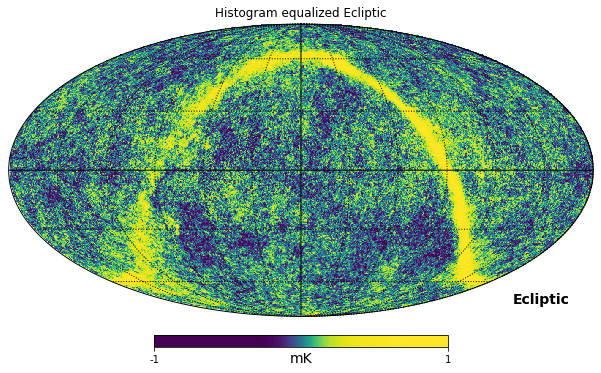

In [15]:
#%%
#
hp.mollview(wmap_map_I,coord=["G", "E"],title="Histogram equalized Ecliptic",unit="mK",norm="hist",min=-1,max=1,)
hp.graticule()
print(len(wmap_map_I))


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        5.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 6.0000e+00, 2.00

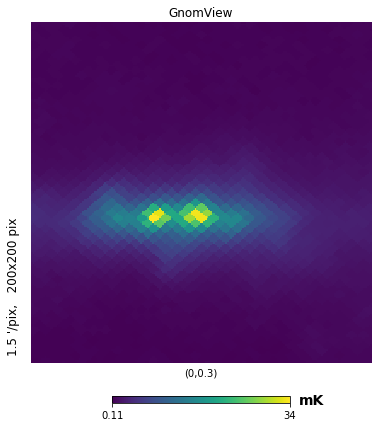

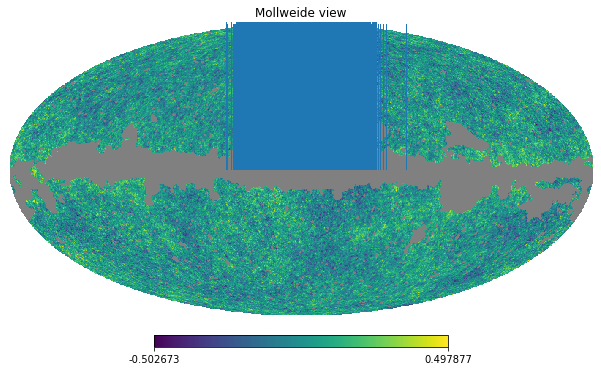

In [10]:
#%%
#
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)
hp.mollview(wmap_map_I_masked.filled())
plt.hist(wmap_map_I_masked.compressed(), bins=1000)



/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:102: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning,
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 25.479654 arcmin (0.007412 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 60.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/oscar/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/oscar/anaconda3/envs/hp/lib/python3.7/sit

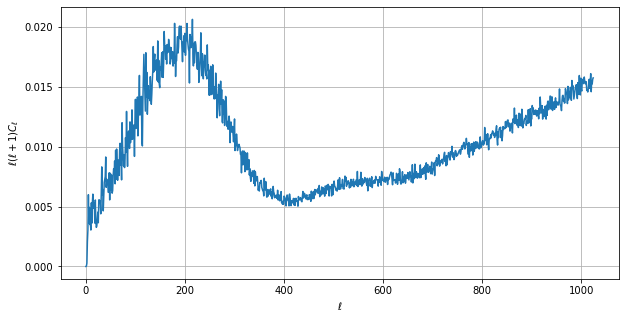

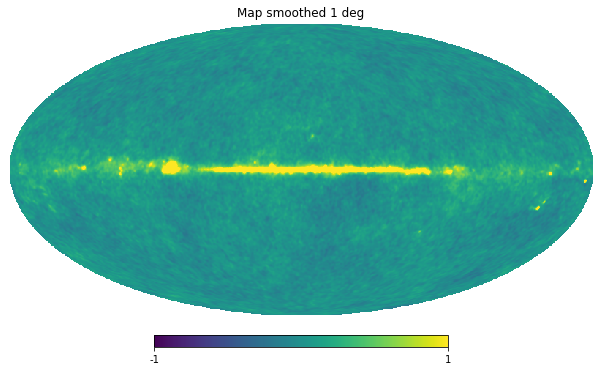

In [11]:
#%%
#
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")







#%%
